In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import accuracy_score , mean_squared_error
import pandas as pd
from tqdm import tqdm_notebook

In [3]:
def sigmoid(x,w,b):
    return 1.0 /(1+np.exp(-(w*x + b)))

In [4]:
print(sigmoid(2,0.6,0.2))

0.8021838885585817


# Ploting sigmoid function

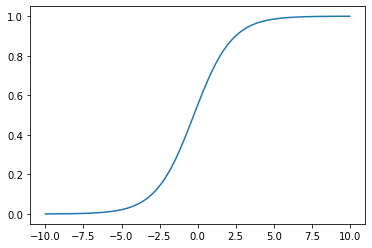

In [5]:
w = 0.8
b = 0.2
x1 = np.linspace(-10,10,100)
y1 = sigmoid(x1,w,b)
plt.plot(x1,y1)
plt.show()

# Ploting 2d sigmoid function

In [27]:
def sigmoid2d(x1,x2,w1,w2,b):
    return 1.0/(1+np.exp(-(w1*x1+w2*x2+b)))

In [28]:
X1 = np.linspace(-10,10,101)
X2 = np.linspace(-10,10,101)
XX1 , XX2 = np.meshgrid(X1,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(101,) (101,) (101, 101) (101, 101)


In [32]:
w1 = 2
w2 =- 0.5
b = 0
Y = sigmoid2d(XX1,XX2,w1,w2,b)

In [33]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

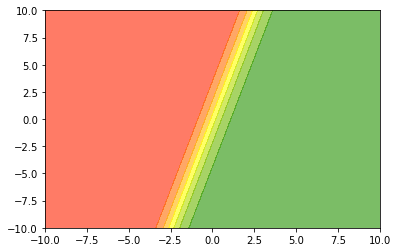

In [34]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

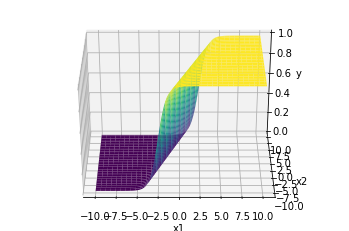

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,270)

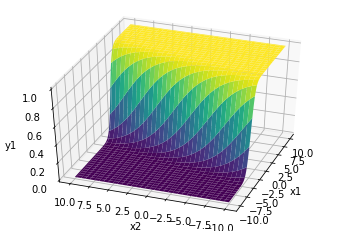

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y1')
ax.view_init(40,200)

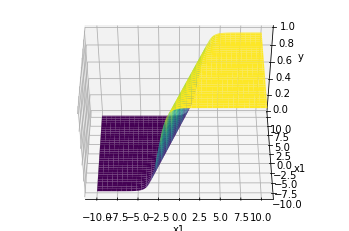

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.view_init(45,270)


# Compute loss for given data

In [56]:
w_unknow = 0.5
b_unknow = 0.25
X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknow,b_unknow)

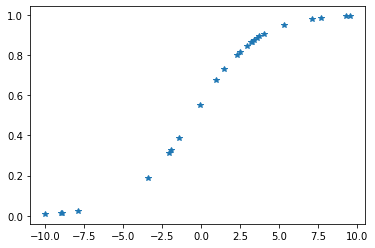

In [57]:
plt.plot(X,Y,"*")
plt.show()

In [58]:
def calculate_loss(x,y,w_est,b_est):
    loss = 0
    for X , Y in zip(x,y):
        loss += (Y-sigmoid(X,w_est,b_est))**2
    return loss
    

In [59]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)
WW , BB = np.meshgrid(W,B)
loss = np.zeros(WW.shape)

In [60]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i,j] += calculate_loss(X,Y,WW[i,j],BB[i,j])

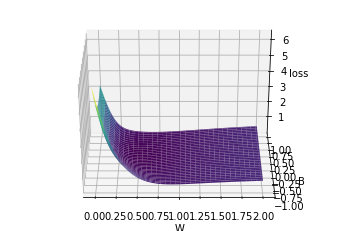

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,loss,cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(30,270)

In [67]:
ij = np.argmin(loss)
i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i*loss.shape[1])

In [68]:
print(i,j)

63 25


In [69]:
print(WW[i,j],BB[i,j])

0.5 0.26


In [71]:
print(loss[i,j])

4.560332077442699e-05


# Class fo sigmoid Neuron 

In [155]:
class Sigmoid:
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self,x):
        return (np.dot(x,self.w.T) + self.b)
    
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=True):
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1,x.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw = 0
            db = 0
            for X , Y in zip(x,y):
                dw += self.grad_w(X,Y)
                db += self.grad_b(X,Y)
            self.w -= lr*dw
            self.b -= lr*db
            
            if display_loss:
                y_pred = self.sigmoid(self.perceptron(x))
                loss[i] = mean_squared_error(y,y_pred)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.sigmoid(self.perceptron(X))
            Y_pred.append(result)
        return np.array(Y_pred)
            

In [156]:
sigmoid = Sigmoid()

# Loading data set

In [75]:
df = pd.read_csv("mobile_cleaned.csv")

In [76]:
df.head(3)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4


In [79]:
X = df.drop('Rating',axis=1)
Y = df['Rating']

In [80]:
Y.values

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

# Fiting threshold

In [83]:
thresold = 4.1
df['class'] = (df['Rating'] >=thresold).astype(np.int)

In [86]:
df['class'].value_counts(normalize=True)

1    0.58651
0    0.41349
Name: class, dtype: float64

In [89]:
Y_binarised = df['class'].values

In [91]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y_binarised,test_size=0.2,stratify=Y_binarised,random_state=1)

In [93]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(272, 87) (69, 87) (272,) (69,)


In [95]:
scaler = StandardScaler()

In [97]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [98]:
minmax_scaler = MinMaxScaler()

In [110]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [111]:
np.min(Y_scaled_train)

0.0

In [112]:
scaled_threshold = list(minmax_scaler.transform(np.array([thresold]).reshape(1, -1)))[0][0]

In [113]:
scaled_threshold

4.1

In [114]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [151]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [ ]:
sigmoid.fit(X_scaled_train, Y_binarised_train, epochs=2000, lr=0.015, display_loss=True)

c:\users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [148]:
Y_pred_train = sigmoid.predict(X_scaled_train)
Y_pred_test = sigmoid.predict(X_scaled_test)

In [152]:
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype("int").ravel()

In [153]:
train_accuracy = accuracy_score(Y_pred_binarised_train , Y_binarised_train)
test_accuracy = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [154]:
print(train_accuracy)
print(test_accuracy)

1.0
1.0
